In [43]:
import warnings
warnings.simplefilter('ignore')

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Table of Contents
>## 1. `ndarray` object
* 1.1. Creating n-D Array
* 1.2. Specifying `dtype`
* 1.3. `Inf` and `NaN`
* 1.4. Some Special Arrays

>## 2. `ndarray` object - Operations
* 2.1. Basic Operations
* 2.2. Dimension Reduction Operation
* 2.3. Descriptive Statistics
* 2.4. Vectorized Operation
* 2.5. Broadcasting
* 2.6. Changing Shape
* 2.7. Concatenate Arrays
* 2.8. Sort
* 2.9. 2D Grid Point

>## 3. Random
* 3.1. Random Seed
* 3.2. Generate Random Numbers
* 3.3. Shuffle
* 3.4. Data Sampling
* 3.5. Data Counting

>## 4. Linear Regression
* 4.1. Generate random data
* 4.2. Plot data
* 4.3. Create a model

## 1. `ndarray` object
* `ndarray object`: faster & requires less memory
  * Solve linear algebra using **vectorized operation**
  * Query using **array indexing**
* How it differs from `list` object:
  * Every element should be of same data type
  * The no. of elements cannot be changed

### 1.1. Creating n-D Array

#### 1D Array

In [41]:
ar = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 2D Array

In [7]:
c = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
c

array([[0, 1, 2],
       [3, 4, 5]])

In [17]:
print(len(c), len(c[0]))
print(c.shape) #returns the shape

2 3
(2, 3)


#### 3D Array

In [18]:
d = np.array([[[1,2,3,4],
               [5,6,7,8],
               [9,10,11,12]],
              [[11,12,13,14],
               [15,16,17,18],
               [19,20,21,22]]])   # 2 x 3 x 4 array

In [19]:
print(len(d), len(d[0]), len(d[0][0]))
print(d.shape)

2 3 4
(2, 3, 4)


### 1.2. Specifying `dtype`
* If not specified, `numpy` chooses appropriate `dtype`

| prefix | dtype | example |
|-|-|-|
| `b` | boolean | `b` | 
| `i` | integer | `i8` (64bit) | 
| `u` | unsigned integer | `u8` (64bit) | 
| `f` | float | `f8` (64bit) | 
| `c` | complex float | `c16` (128bit) | 
| `O` | object pointer | `0` | 
| `S` | byte string | `S24` | 
| `U` | Unicode string | `U24` | 

In [4]:
x = np.array([1, 2, 3], dtype='f')
x.dtype

dtype('float32')

In [5]:
x[0] + x[1]

3.0

In [6]:
x = np.array([1, 2, 3], dtype='U')
x.dtype

dtype('<U1')

In [7]:
x[0] + x[1]

'12'

### 1.3. `Inf` and `NaN`
* `inf`: infinity
* `NaN`: Not a Number

In [45]:
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

array([  0.,  inf, -inf,  nan])

### 1.4. Some Special Arrays
* `zeros` & `zeros_like`
* `ones` & `ones_like`
* `empty`
* `arange`
* `linespace` & `logspace`
* `rand` & `randn`
* special matrices

#### zeros & zeros_like

In [50]:
a = np.zeros(5) 
b = np.zeros((2, 3)) #use tuple to make multi-dim array
c = np.zeros((5, 2), dtype="i") 
d = np.zeros(5, dtype="U4") #if a string longer than 4 is assigned, only the first 4 characters will be assigned

In [51]:
e = np.zeros_like(d, dtype='f') #follows the shape of d

#### ones & ones_like

In [53]:
a = np.ones((2, 3, 4), dtype='i8')
b = np.ones_like(a, dtype='f')

#### empty 

In [58]:
a = np.empty((4, 3)) #Return a new array of given shape and type, without initializing entries
a

array([[ 1.49166815e-154, -1.73060253e-077,  3.45845952e-323],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

#### arange

In [65]:
np.arange(10)  # 0 .. n-1  
np.arange(3, 21, 2) #from 3 to 21(excluded), stepsize=2

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

#### linespace & logspace

In [64]:
np.linspace(0, 100, 5) # from 0 to 100(included), no. of elements=5
np.logspace(0, 100, 5) # from e+0 to e+100, no. of elements=5 

array([1.e+000, 1.e+025, 1.e+050, 1.e+075, 1.e+100])

#### rand & randn

In [68]:
np.random.rand(3,2) #random elements from a uniform distribution over [0, 1)
np.random.randn(2, 4) #random elements from a normal distribution, average=0, variance=1

array([[-0.22778266,  0.42290089, -2.4204732 ,  0.175449  ],
       [ 1.18026777, -0.13413173, -0.00536587,  1.27745947]])

#### special matrices

In [182]:
#Diagonal
matrix1 = np.diag([1,5,9])

#Identity
matrix2 = np.identity(3)
matrix3 = np.eye(3)

#Symmetric
matrix4 = matrix3 + matrix3.T

## 2. `ndarray` object - Operations

### 2.1. Basic Operations

#### Transpose (Attribute)

In [80]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

#### dimension & shape

In [21]:
print(d.ndim)
print(d.shape)

3
(2, 3, 4)


#### indexing (same as list indexing)

In [23]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a[0,0], a[-1,-1]

(0, 5)

#### slicing

In [29]:
a = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
a[0, :] #first row
a[:, 1] #second column
a[:2, :2]

array([[0, 1],
       [4, 5]])

#### Query - array indexing (fancy indexing) - boolean
* should be of same size

In [30]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
idx = np.array([True, False, True, False, True, False, True, False, True, False])
a[idx]

array([0, 2, 4, 6, 8])

* Simple alternative

In [31]:
a % 2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [32]:
a % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [33]:
a[a % 2 == 0]

array([0, 2, 4, 6, 8])

#### Query - array indexing (fancy indexing) - integer
* 1D array

In [36]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 2, 4, 6, 8])
a[idx]

array([11, 33, 55, 77, 99])

In [37]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
a[idx]

array([11, 11, 11, 11, 11, 11, 22, 22, 22, 22, 22, 33, 33, 33, 33, 33])

* 2+D array

In [38]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [39]:
a[:, [True, False, False, True]]

array([[ 1,  4],
       [ 5,  8],
       [ 9, 12]])

In [40]:
a[[2, 0, 1], :]

array([[ 9, 10, 11, 12],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8]])

#### np.where(condition, [x, y])

In [179]:
a = np.array([0, 2, 4, 6, 8])
b = np.array([-1, -1, -1, -1, -1])

np.where(a > 4, a, b) # if a > 4, take value from a / otherwise, take value from b
np.where([True, False, True, False, True], a, b)

array([ 0, -1,  4, -1,  8])

### 2.2. Dimension Reduction Operation
* `min`, `max`, `argmin`, `argmax`
* `sum`, `mean`, `median`, `std`, `var`
* `all`, `any`

In [127]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [128]:
x.sum()

6

In [129]:
x.sum(axis=0)   # column wise

array([3, 3])

In [130]:
x.sum(axis=1)   # row wise

array([2, 4])

In [131]:
a = np.zeros((100, 100), dtype=np.int)
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [132]:
np.any(a != 0)

False

In [133]:
np.all(a == a)

True

In [134]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

In [135]:
((a <= b) & (b <= c)).all()

True

### 2.3. Descriptive Statistics
* count
* mean, var, stdev
* max, min, median, quartile

In [144]:
x = np.array([ 18,   5,  10,  23,  19,  -8,  10,   0,   0,   5,   2,  15,   8,
                2,   5,   4,  15,  -1,   4,  -7, -24,   7,   9,  -6,  23, -13])

In [151]:
len(x)

26

In [152]:
np.mean(x)
np.var(x)
np.std(x)

10.734628476137871

In [153]:
np.max(x)
np.min(x)
np.median(x)

5.0

In [154]:
np.percentile(x, 0)
np.percentile(x, 25)
np.percentile(x, 50)
np.percentile(x, 75)
np.percentile(x, 100)

23.0

#### Alternative - `describe` method in `SciPy`

In [155]:
from scipy.stats import describe

In [156]:
describe(x)

DescribeResult(nobs=26, minmax=(-24, 23), mean=4.8076923076923075, variance=119.84153846153846, skewness=-0.4762339485461929, kurtosis=0.37443381660038977)

### 2.4. Vectorized Operation

In [109]:
a = np.array([1, 2, 3, 4])
b = np.array([10, 2, 3, 40])

In [110]:
2 * a + b

array([12,  6,  9, 48])

In [114]:
a == b

array([False,  True,  True, False])

In [115]:
np.all(a == b)

False

In [116]:
np.exp(a)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [117]:
10 ** a

array([   10,   100,  1000, 10000])

In [118]:
np.log(a + 1)

array([0.69314718, 1.09861229, 1.38629436, 1.60943791])

#### inner product - vectors

In [180]:
# hard way
x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])
innerproduct = np.dot(x.T, y)
result = innerproduct[0,0]

# easy way
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
result = np.dot(x,y)

#### inner product - matrices

In [181]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = np.dot(A, B)

### 2.5. Broadcasting
* When the two arrays have different dimension,
* The smaller one is extended to match the size of the bigger one

#### Broadcasting Scalar

$$ 
\begin{bmatrix}0 \\ 1 \\ 2 \\ 3 \\ 4 \end{bmatrix} + 1 = 
\begin{bmatrix}0 \\ 1 \\ 2 \\ 3 \\ 4 \end{bmatrix} +  \begin{bmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} = 
\begin{bmatrix}1 \\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix}
$$

#### Broadcasting Vector

$$ 
\begin{bmatrix}0 & 1 & 2 \\ 1 & 2 & 3 \\ 2 & 3 & 4 \\ 3 & 4 & 5 \\ 4 & 5 & 6 \end{bmatrix}
+
\begin{bmatrix}0 \\ 1 \\ 2 \\ 3 \\ 4 \end{bmatrix} 
=
\begin{bmatrix}0 & 1 & 2 \\ 1 & 2 & 3 \\ 2 & 3 & 4 \\ 3 & 4 & 5 \\ 4 & 5 & 6 \end{bmatrix}
+
\begin{bmatrix}0 & 0 & 0 \\ 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \\ 4 & 4 & 4 \end{bmatrix}
$$

$$ 
\begin{bmatrix}0 & 1 & 2 \\ 1 & 2 & 3 \\ 2 & 3 & 4 \\ 3 & 4 & 5 \\ 4 & 5 & 6 \end{bmatrix}
+
\begin{bmatrix}0 & 1 & 2 \end{bmatrix} 
=
\begin{bmatrix}0 & 1 & 2 \\ 1 & 2 & 3 \\ 2 & 3 & 4 \\ 3 & 4 & 5 \\ 4 & 5 & 6 \end{bmatrix}
+
\begin{bmatrix}0 & 1 & 2 \\ 0 & 1 & 2 \\ 0 & 1 & 2 \\ 0 & 1 & 2 \\ 0 & 1 & 2 \end{bmatrix} 
$$

### 2.6. Changing Shape

#### reshape

In [81]:
a = np.arange(12)
b = a.reshape(3, 4)
c = a.reshape(3, -1) #one element of the tuple can be replaced with -1
d = a.reshape(2, 2, -1)

#### ravel - shallow copy & flatten - deep copy
* order=`C` $\rightarrow$ row flatten
* order=`F` $\rightarrow$ column flatten

In [176]:
a1 = np.ones((3,3))
a2 = a1.ravel()
a3 = a1.flatten()
a1[0,0] = 0.0

print(arr1, arr2, arr3, sep="\n\n")

[[0. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[0. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### newaxis

In [92]:
x = np.arange(5)
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

### 2.7.  Concatenate Arrays

* `hstack` & `vstack` & `dstack`
* `r_` & `c_`
* `tile`

#### hstack
* Arrays with **same no. of rows** $\rightarrow$ stack **horizontally** (column-wise)
* The arrays should be put inside a list

In [93]:
a1 = np.ones((2, 3))
a2 = np.zeros((2, 2))
np.hstack([a1, a2])

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

#### vstack
* Arrays with **same no. of columns** $\rightarrow$ stack **vertically** (row-wise)
* The arrays should be put inside a list

In [94]:
b1 = np.ones((2, 3))
b2 = np.zeros((3, 3))
np.vstack([b1, b2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### dstack
* Arrays with **same shape along all but the third axis** $\rightarrow$ stack along third axis (**depth wise**)

In [96]:
c1 = np.ones((3, 4))
c2 = np.zeros((3, 4))
np.dstack([c1, c2])

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

#### stack
* stack along arbitrary axis
* `axis=n` $\rightarrow$ `n`th dimension is added
* default `axis=0`

In [98]:
d = np.stack([c1, c2], axis=0)
e = np.stack([c1, c2], axis=1) 
f = np.stack([c1, c2], axis=2)
print(d.shape, e.shape, f.shape)

(2, 3, 4) (3, 2, 4) (3, 4, 2)


#### r_
* similar to `hstack` / stack horizontally
* use **bracket** instead of parenthesis
* such kind of methods is called **indexer**

In [48]:
np.r_[np.array([1, 2, 3]), np.array([4,5,6])]

array([1, 2, 3, 4, 5, 6])

#### c_
* increase the dimension & stack horizontally
* also an **indexer**

In [99]:
np.c_[np.array([1, 2, 3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

#### tile
* repeat the array

In [100]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [101]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 2.8. Sort
* **in-place method** (changes original)
* parameter: `axis` (default = -1)

In [136]:
a = np.array([[4,  3,  5,  7], 
              [1, 12, 11,  9],
              [2, 15,  1, 14]])
a

array([[ 4,  3,  5,  7],
       [ 1, 12, 11,  9],
       [ 2, 15,  1, 14]])

In [138]:
np.sort(a)

array([[ 3,  4,  5,  7],
       [ 1,  9, 11, 12],
       [ 1,  2, 14, 15]])

In [139]:
np.sort(a, axis=0)

array([[ 1,  3,  1,  7],
       [ 2, 12,  5,  9],
       [ 4, 15, 11, 14]])

In [140]:
a.sort(axis=1) #in-place
a

array([[ 3,  4,  5,  7],
       [ 1,  9, 11, 12],
       [ 1,  2, 14, 15]])

* `argsort`: simply returns the order

In [141]:
a = np.array([42, 38, 12, 25])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [142]:
a[j]

array([12, 25, 38, 42])

In [143]:
np.sort(a)

array([12, 25, 38, 42])

### 2.9. 2D Grid Point
* Use `meshgrid` method

In [102]:
x = np.arange(3) # x = [0,1,2]
y = np.arange(5) # y = [0,1,2,3,4]

X, Y = np.meshgrid(x, y)

In [103]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [104]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [105]:
[list(zip(x, y)) for x, y in zip(X, Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

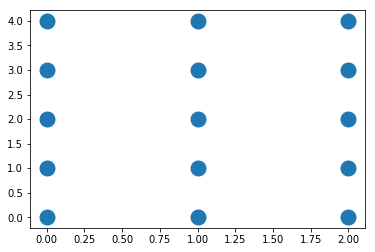

In [108]:
plt.scatter(X, Y, linewidths=10)
plt.show()

## 3. Random

### 3.1. Random Seed

In [157]:
np.random.seed(0) #use an integer >= 0

### 3.2. Generate Random Numbers
* `rand`: uniform distribution `[0,1)`
* `randn`: Gaussian Normal distribution (average=0, variance=1)
* `randint`: random integer
  * `randint(low, high=None, size=None)

In [16]:
np.random.rand(3, 5)

array([[ 0.31720174,  0.77834548,  0.94957105,  0.66252687,  0.01357164],
       [ 0.6228461 ,  0.67365963,  0.971945  ,  0.87819347,  0.50962438],
       [ 0.05571469,  0.45115921,  0.01998767,  0.44171092,  0.97958673]])

In [18]:
np.random.randn(3, 5)

array([[-0.49114966,  0.71267817,  1.11334035, -2.15367459, -0.41611148],
       [-1.07089699,  0.22113881, -1.12305712, -1.05075796,  1.01207905],
       [ 1.54371643, -0.40211489,  0.8647491 , -0.22686923,  0.81116027]])

In [167]:
np.random.randint(1, 5, size=10)

array([4, 1, 4, 3, 4, 4, 2, 2, 2, 1])

### 3.3. Shuffle

In [162]:
x = np.arange(10)
np.random.shuffle(x) #in-place
x

array([3, 6, 1, 8, 5, 0, 9, 4, 7, 2])

### 3.4. Data Sampling
* Use `numpy.random.choice(a, size=None, replace=True, p=None)`
* Parameters
  * a: array (if given as an integer $\rightarrow$ range(a))
  * size: integer, size of the sampled data
  * replace: if True, a data can be selected more than once
  * p: array, probability of each element being selected

In [163]:
np.random.choice(5, 5, replace=False)  # shuffle 명령과 같다.

array([3, 2, 1, 4, 0])

In [164]:
np.random.choice(5, 3, replace=False)  # 3개만 선택

array([3, 0, 2])

In [165]:
np.random.choice(5, 10) # 반복해서 10개 선택

array([0, 1, 1, 1, 1, 3, 3, 2, 3, 0])

In [166]:
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])  # 선택 확률을 다르게 해서 10개 선택

array([2, 2, 3, 3, 3, 2, 2, 2, 3, 2])

## 3.5. Data Counting
* Real-valued random numbers $\rightarrow$ use histogram
* Integer random numbers $\rightarrow$ use `unique` or `bincount`

In [168]:
np.unique([11, 11, 2, 2, 34, 34])

array([ 2, 11, 34])

In [169]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)

In [170]:
index

array(['a', 'b', 'c'], dtype='<U1')

In [173]:
count #disregard unappeared items

array([2, 2, 1])

In [172]:
np.bincount([1, 1, 2, 2, 2, 3], minlength=6) #count for all the numbers from 0 to minlength-1

array([0, 2, 3, 1, 0, 0])

## 4. Linear regression

### 4.1. Generate random data

In [14]:
x = np.random.randn(100)
y = 4 * x + 30 + 1. * np.random.randn(100) #added noise to linear correlation

### 4.2. Plot data

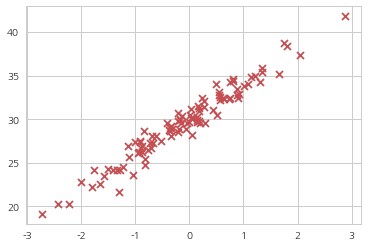

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y, c='r', marker='x')

### 4.3. Create a model

In [16]:
x = x.reshape(100, 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

w = model.coef_      # w = slope
b = model.intercept_ # b = bias

w, b                 # w is given as an array because y can be dependent on multiple variables

(array([ 4.05712161]), 30.015770810376829)

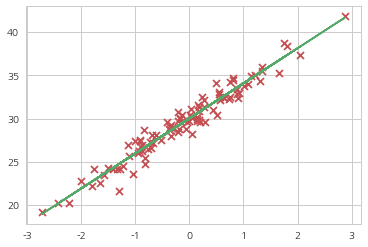

In [17]:
plt.scatter(x, y, c='r', marker='x')
plt.plot(x, w * x + b, 'g-')